### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import matplotlib.cm as cm


import tensorflow as tf
import keras
from tensorflow.keras import datasets,models,layers
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.datasets import cifar10



from keras.callbacks import EarlyStopping
from keras.layers import Dense, Conv2D,  MaxPool2D, Flatten, GlobalAveragePooling2D
from keras.layers import BatchNormalization, Layer, Add, DepthwiseConv2D, Dropout

from keras.models import Sequential
from keras.models import Model
import tensorflow as tf
from keras.callbacks import EarlyStopping

from keras.optimizers import SGD

import cv2

# Visualization Function

In [ ]:
classes = ["airplane", "automobile", "bird", "cat", "deer", 
           "dog", "frog", "horse", "ship", "truck"]

def show_images(images, target):

  plt.figure(figsize=(15 ,15))

  for i in range(25):
      plt.subplot(5, 5,i+1)
      plt.title(classes[np.argmax(target[i])])
      plt.imshow(images[i])

  plt.show()

# Download CIFAR10

* https://www.kaggle.com/vakninmaor/cifar-10-for-beginners-score-90


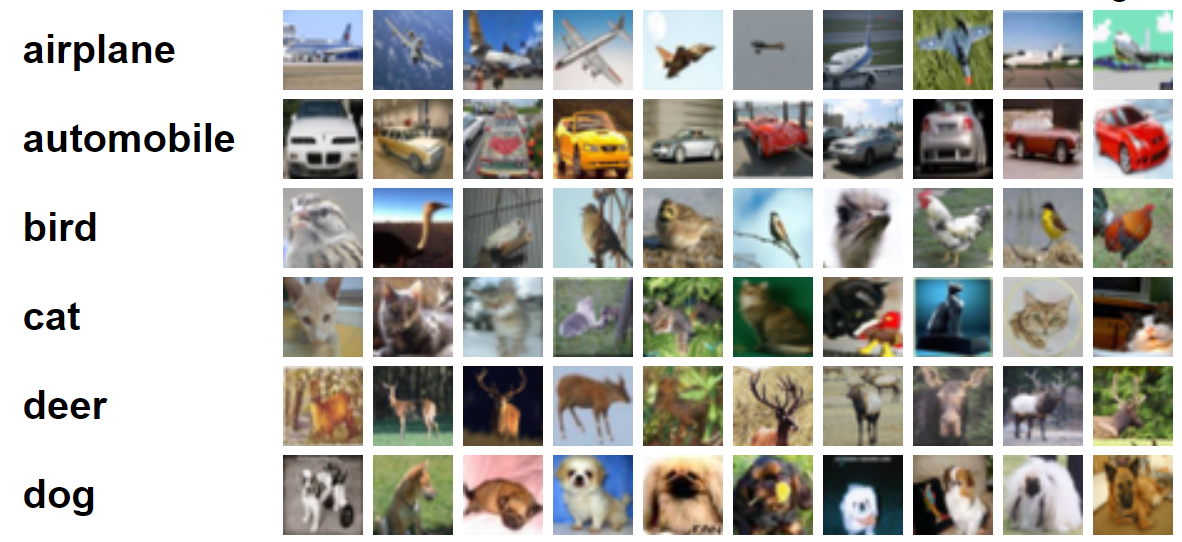



In [ ]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [ ]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
X_train[0].max(), X_train[0].min()

(255, 0)

# Normalize Images

In [ ]:
# Normalize the data.
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
X_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

# Validation Split

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, 
                                                  test_size = 0.2,
                                                  shuffle = True)

In [ ]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((40000, 32, 32, 3), (40000, 1), (10000, 32, 32, 3), (10000, 1))

# Image Preprocessing

### One Hot Encoding

In [ ]:
[0, 5, 6, 7, 8, 9]

In [ ]:
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [ ]:
encoder = OneHotEncoder()
encoder.fit(Y_train)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [ ]:
encoder.transform(Y_train)

<40000x10 sparse matrix of type '<class 'numpy.float64'>'
	with 40000 stored elements in Compressed Sparse Row format>

In [ ]:
Y_train = encoder.transform(Y_train).toarray()
Y_test = encoder.transform(Y_test).toarray()
Y_val =  encoder.transform(Y_val).toarray()

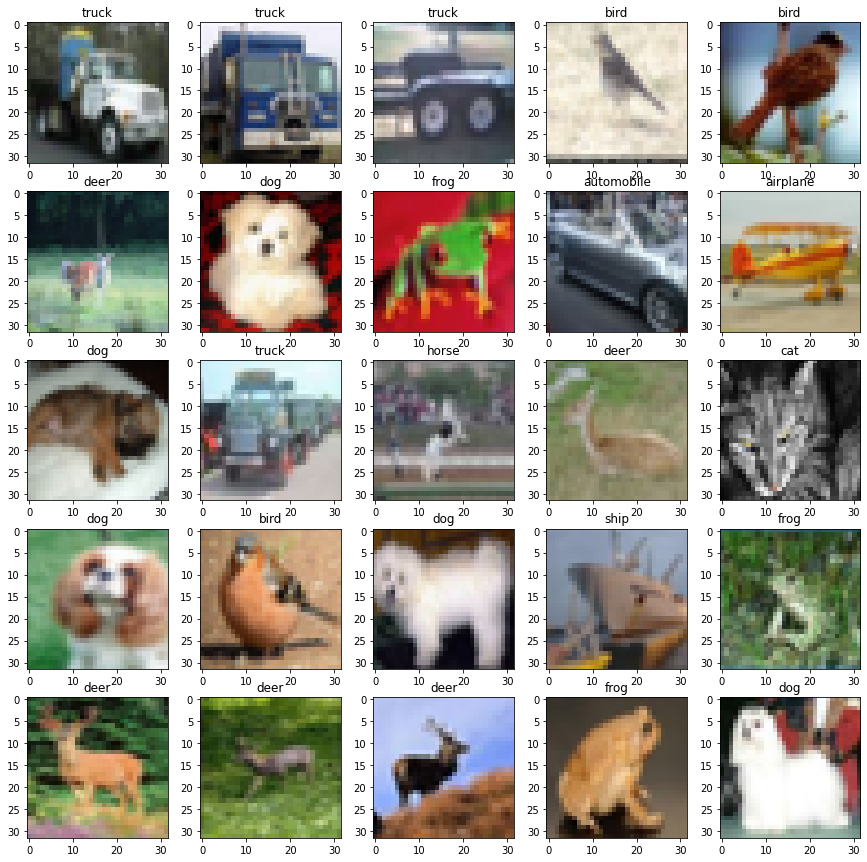

In [ ]:
show_images(X_train, Y_train)

In [ ]:
Y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

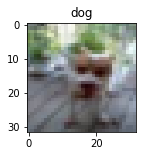

In [ ]:
plt.figure(figsize=(2, 2))
plt.title(classes[np.argmax(Y_train[43])])
plt.imshow(X_train[43])

# Model 

In [ ]:
# 32 x 32
# 16 x 16
# 8 x 8
# 4 x 4

### ResNet18

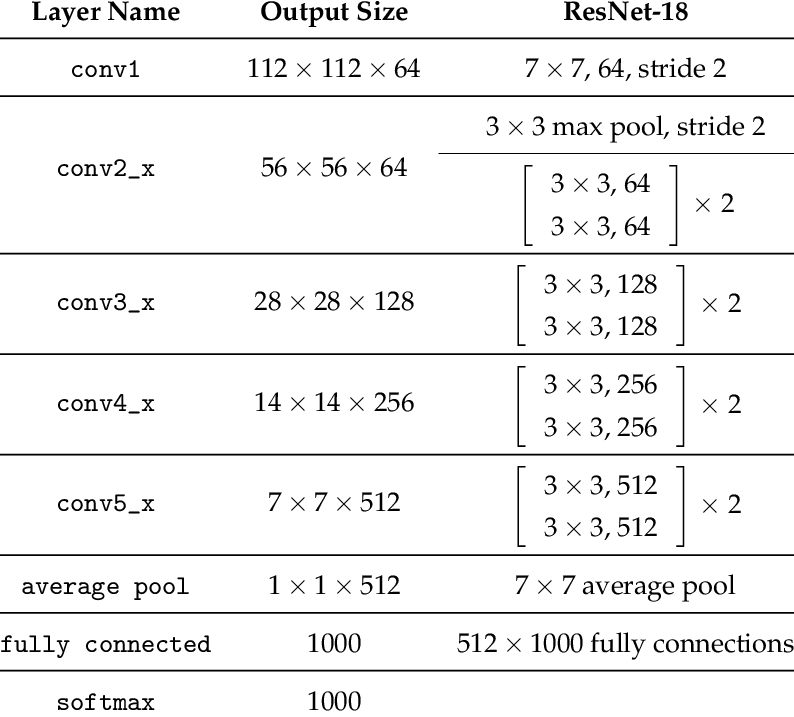

In [ ]:
"""
ResNet-18
Reference:
[1] K. He et al. Deep Residual Learning for Image Recognition. CVPR, 2016
[2] K. He, X. Zhang, S. Ren, and J. Sun. Delving deep into rectifiers:
Surpassing human-level performance on imagenet classification. In
ICCV, 2015.
"""

class ResnetBlock(Model):
    """
    A standard resnet block.
    """

    def __init__(self, channels: int, down_sample=False):
        """
        channels: same as number of convolution kernels
        """
        super().__init__()

        self.__channels = channels
        self.__down_sample = down_sample
        self.__strides = [2, 1] if down_sample else [1, 1]

        KERNEL_SIZE = (3, 3)
        # use He initialization, instead of Xavier (a.k.a 'glorot_uniform' in Keras), as suggested in [2]
        INIT_SCHEME = "he_normal"

        self.conv_1 = Conv2D(self.__channels, strides=self.__strides[0],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_1 = BatchNormalization()
        self.conv_2 = Conv2D(self.__channels, strides=self.__strides[1],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_2 = BatchNormalization()
        self.merge = Add()

        if self.__down_sample:
            # perform down sampling using stride of 2, according to [1].
            self.res_conv = Conv2D(
                self.__channels, strides=2, kernel_size=(1, 1), kernel_initializer=INIT_SCHEME, padding="same")
            self.res_bn = BatchNormalization()

    def call(self, inputs):
        res = inputs

        x = self.conv_1(inputs)
        x = self.bn_1(x)
        x = tf.nn.relu(x)
        x = self.conv_2(x)
        x = self.bn_2(x)

        if self.__down_sample:
            res = self.res_conv(res)
            res = self.res_bn(res)

        # if not perform down sample, then add a shortcut directly
        x = self.merge([x, res])
        out = tf.nn.relu(x)
        return out


class ResNet18(Model):

    def __init__(self, num_classes, **kwargs):
        """
            num_classes: number of classes in specific classification task.
        """
        super().__init__(**kwargs)
        self.conv_1 = Conv2D(64, (7, 7), strides=2,
                             padding="same", kernel_initializer="he_normal")
        self.init_bn = BatchNormalization()
        self.pool_2 = MaxPool2D(pool_size=(2, 2), strides=2, padding="same")
        self.res_1_1 = ResnetBlock(64)
        self.res_1_2 = ResnetBlock(64)
        self.res_2_1 = ResnetBlock(128, down_sample=True)
        self.res_2_2 = ResnetBlock(128)
        self.res_3_1 = ResnetBlock(256, down_sample=True)
        self.res_3_2 = ResnetBlock(256)
        self.res_4_1 = ResnetBlock(512, down_sample=True)
        self.res_4_2 = ResnetBlock(512)
        self.avg_pool = GlobalAveragePooling2D()
        self.flat = Flatten()
        self.fc = Dense(num_classes, activation="softmax")

    def call(self, inputs):
        out = self.conv_1(inputs)
        out = self.init_bn(out)
        out = tf.nn.relu(out)
        out = self.pool_2(out)
        for res_block in [self.res_1_1, self.res_1_2, self.res_2_1, self.res_2_2, self.res_3_1, self.res_3_2, self.res_4_1, self.res_4_2]:
            out = res_block(out)
        out = self.avg_pool(out)
        out = self.flat(out)
        out = self.fc(out)
        return out

In [ ]:
model = ResNet18(10)
model.build(input_shape = (None,32,32,3))

Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [ ]:
model.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=["accuracy"]) 

In [ ]:
model.summary()

Model: "res_net18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  9472      
_________________________________________________________________
batch_normalization (BatchNo multiple                  256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
resnet_block (ResnetBlock)   multiple                  74368     
_________________________________________________________________
resnet_block_1 (ResnetBlock) multiple                  74368     
_________________________________________________________________
resnet_block_2 (ResnetBlock) multiple                  231296    
_________________________________________________________________
resnet_block_3 (ResnetBlock) multiple                  29

In [ ]:
BATCH_SIZE = 256
EPOCHS = 50

es = EarlyStopping(patience= 8, restore_best_weights=True, monitor="val_accuracy")
STEPS = len(X_train)/BATCH_SIZE
history = model.fit(
                    X_train,
                    Y_train,
                    steps_per_epoch = STEPS, 
                    batch_size=BATCH_SIZE, 
                    epochs=EPOCHS, 
                    validation_data=(X_val, Y_val), 
                    callbacks=[es])


Epoch 1/50
156/156 [==============================] - 11s 58ms/step - loss: 1.9065 - accuracy: 0.3748 - val_loss: 3.2236 - val_accuracy: 0.2444
Epoch 2/50
156/156 [==============================] - 8s 51ms/step - loss: 1.1763 - accuracy: 0.5832 - val_loss: 2.1583 - val_accuracy: 0.3350
Epoch 3/50
156/156 [==============================] - 8s 50ms/step - loss: 0.9488 - accuracy: 0.6625 - val_loss: 1.1830 - val_accuracy: 0.5904
Epoch 4/50
156/156 [==============================] - 8s 50ms/step - loss: 0.7721 - accuracy: 0.7290 - val_loss: 1.6476 - val_accuracy: 0.5109
Epoch 5/50
156/156 [==============================] - 8s 50ms/step - loss: 0.6262 - accuracy: 0.7790 - val_loss: 1.3156 - val_accuracy: 0.5947
Epoch 6/50
156/156 [==============================] - 8s 49ms/step - loss: 0.5117 - accuracy: 0.8228 - val_loss: 1.5804 - val_accuracy: 0.5691
Epoch 7/50
156/156 [==============================] - 8s 49ms/step - loss: 0.4113 - accuracy: 0.8536 - val_loss: 1.6171 - val_accuracy: 0.550

In [ ]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()


In [ ]:
print(history.history.keys())
plotmodelhistory(history)

In [ ]:
ModelLoss, ModelAccuracy = model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE)

print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy))

40/40 [==============================] - 1s 17ms/step - loss: 1.8431 - accuracy: 0.6640
Model Loss is 1.843070149421692
Model Accuracy is 0.6639999747276306


In [ ]:
## Data Augmentation
aug = ImageDataGenerator(horizontal_flip=True, 
                         width_shift_range=0.05,
                         height_shift_range=0.05)
aug.fit(X_train)


## Width Shift


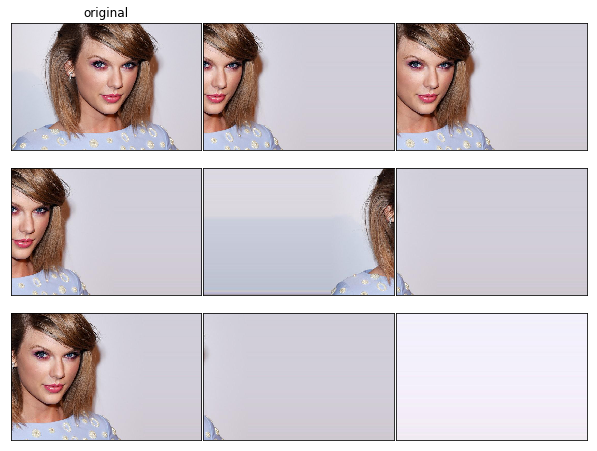

## Height shift 


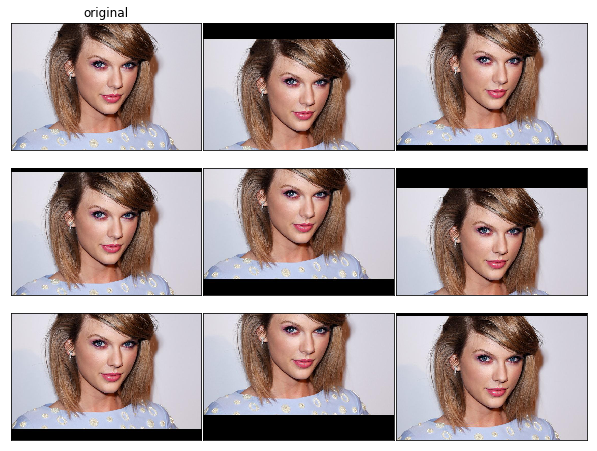

In [ ]:
model = ResNet18(10)
model.build(input_shape = (None,32,32,3))
model.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=["accuracy"]) 


history = model.fit(aug.flow(X_train, Y_train, 
                             batch_size = BATCH_SIZE), 
                    steps_per_epoch=STEPS, 
                    batch_size = BATCH_SIZE, 
                    epochs=EPOCHS, 
                    validation_data=(X_val, Y_val),
                    callbacks=[es])

Epoch 1/50
156/156 [==============================] - 20s 115ms/step - loss: 1.9404 - accuracy: 0.3550 - val_loss: 2.1896 - val_accuracy: 0.3132
Epoch 2/50
156/156 [==============================] - 17s 111ms/step - loss: 1.2576 - accuracy: 0.5471 - val_loss: 1.4856 - val_accuracy: 0.4792
Epoch 3/50
156/156 [==============================] - 18s 112ms/step - loss: 1.0783 - accuracy: 0.6140 - val_loss: 1.2684 - val_accuracy: 0.5592
Epoch 4/50
156/156 [==============================] - 18s 113ms/step - loss: 0.9697 - accuracy: 0.6539 - val_loss: 0.9893 - val_accuracy: 0.6548
Epoch 5/50
156/156 [==============================] - 18s 113ms/step - loss: 0.8697 - accuracy: 0.6917 - val_loss: 0.9902 - val_accuracy: 0.6529
Epoch 6/50
156/156 [==============================] - 18s 117ms/step - loss: 0.7754 - accuracy: 0.7261 - val_loss: 1.0108 - val_accuracy: 0.6492
Epoch 7/50
156/156 [==============================] - 18s 116ms/step - loss: 0.7314 - accuracy: 0.7422 - val_loss: 0.9863 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


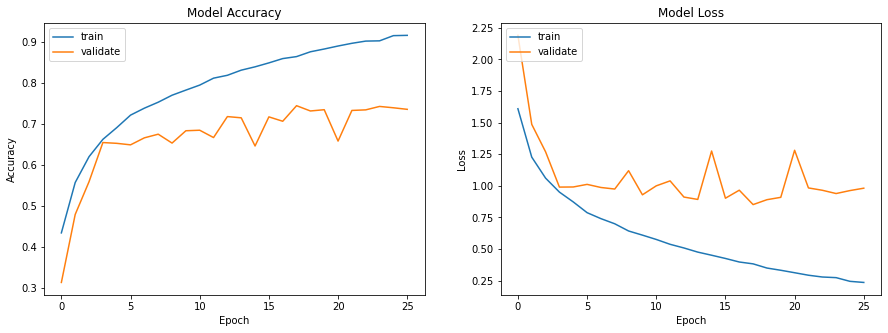

In [ ]:
print(history.history.keys())
plotmodelhistory(history)

In [ ]:
ModelLoss, ModelAccuracy = model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE)

print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy))

40/40 [==============================] - 1s 20ms/step - loss: 0.8676 - accuracy: 0.7435
Model Loss is 0.8676249980926514
Model Accuracy is 0.7434999942779541


### Learning Rate

In [ ]:
model = ResNet18(10)
model.build(input_shape = (None,32,32,3))

es = EarlyStopping(patience= 18, restore_best_weights=True, monitor="val_accuracy")
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=["accuracy"]) 


history = model.fit(aug.flow(X_train, Y_train, 
                             batch_size = BATCH_SIZE), 
                    steps_per_epoch=STEPS, 
                    batch_size = BATCH_SIZE, 
                    epochs=EPOCHS, 
                    validation_data=(X_val, Y_val),
                    callbacks=[es])

Epoch 1/50
156/156 [==============================] - 21s 117ms/step - loss: 2.2240 - accuracy: 0.2779 - val_loss: 1.9361 - val_accuracy: 0.2976
Epoch 2/50
156/156 [==============================] - 18s 113ms/step - loss: 1.5746 - accuracy: 0.4388 - val_loss: 1.5220 - val_accuracy: 0.4507
Epoch 3/50
156/156 [==============================] - 18s 113ms/step - loss: 1.4097 - accuracy: 0.4954 - val_loss: 1.4230 - val_accuracy: 0.4876
Epoch 4/50
156/156 [==============================] - 17s 111ms/step - loss: 1.3001 - accuracy: 0.5315 - val_loss: 1.4166 - val_accuracy: 0.4998
Epoch 5/50
156/156 [==============================] - 17s 111ms/step - loss: 1.2286 - accuracy: 0.5553 - val_loss: 1.4197 - val_accuracy: 0.5094
Epoch 6/50
156/156 [==============================] - 17s 111ms/step - loss: 1.1502 - accuracy: 0.5912 - val_loss: 1.3056 - val_accuracy: 0.5385
Epoch 7/50
156/156 [==============================] - 17s 110ms/step - loss: 1.1032 - accuracy: 0.6070 - val_loss: 1.3515 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


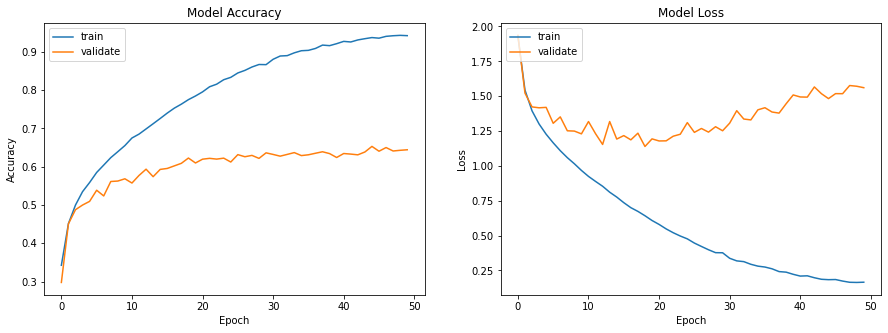

In [ ]:
print(history.history.keys())
plotmodelhistory(history)

### More Augmentation

In [ ]:
# Data augumetation
aug = ImageDataGenerator(
        rotation_range=0.3,  
        zoom_range = 0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1,
        horizontal_flip=True)


aug.fit(X_train)

In [ ]:
model = ResNet18(10)
model.build(input_shape = (None,32,32,3))

es = EarlyStopping(patience=40, restore_best_weights=True, monitor="val_accuracy")
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=["accuracy"]) 


history = model.fit(aug.flow(X_train, Y_train, 
                             batch_size = BATCH_SIZE), 
                    steps_per_epoch=STEPS, 
                    batch_size = BATCH_SIZE, 
                    epochs=EPOCHS, 
                    validation_data=(X_val, Y_val),
                    callbacks=[es])

Epoch 1/50
156/156 [==============================] - 22s 124ms/step - loss: 2.2921 - accuracy: 0.2600 - val_loss: 2.0236 - val_accuracy: 0.2451
Epoch 2/50
156/156 [==============================] - 19s 123ms/step - loss: 1.6819 - accuracy: 0.3997 - val_loss: 1.5505 - val_accuracy: 0.4362
Epoch 3/50
156/156 [==============================] - 19s 124ms/step - loss: 1.5150 - accuracy: 0.4581 - val_loss: 1.4871 - val_accuracy: 0.4723
Epoch 4/50
156/156 [==============================] - 19s 121ms/step - loss: 1.4207 - accuracy: 0.4874 - val_loss: 1.3861 - val_accuracy: 0.5085
Epoch 5/50
156/156 [==============================] - 19s 118ms/step - loss: 1.3597 - accuracy: 0.5088 - val_loss: 1.3820 - val_accuracy: 0.5099
Epoch 6/50
156/156 [==============================] - 19s 119ms/step - loss: 1.2957 - accuracy: 0.5339 - val_loss: 1.2934 - val_accuracy: 0.5335
Epoch 7/50
156/156 [==============================] - 19s 119ms/step - loss: 1.2508 - accuracy: 0.5499 - val_loss: 1.2869 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


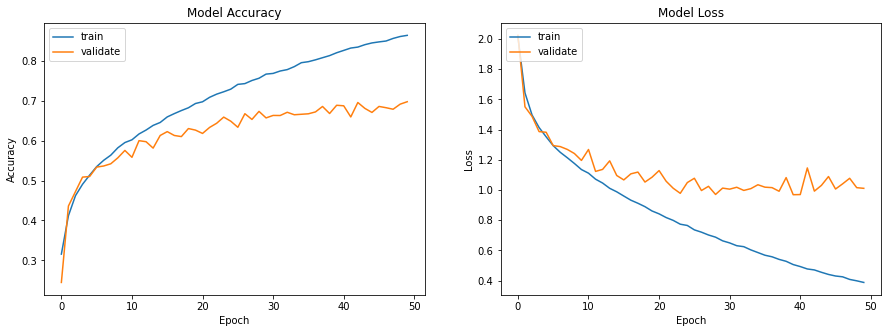

In [ ]:
print(history.history.keys())
plotmodelhistory(history)

In [ ]:
ModelLoss, ModelAccuracy = model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE)

print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy))

40/40 [==============================] - 1s 19ms/step - loss: 1.0413 - accuracy: 0.6933
Model Loss is 1.0413105487823486
Model Accuracy is 0.6933000087738037


In [ ]:
model_layers = [
    Conv2D(32, (3, 3), activation='relu', strides=(1,1), padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(3,3), strides=(1, 1), padding='same', activation=keras.activations.relu, depth_multiplier=3),
#     MaxPooling2D(2, 2),
    Dropout(rate =0.1),
    
    
    Conv2D(64, (3, 3), activation='relu', strides=(2, 2), padding='same'),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(3,3), strides=(1, 1), padding='same', activation=keras.activations.relu),
#     MaxPooling2D(2, 2),
    Dropout(rate = 0.1),
    
    Conv2D(128, (3, 3), activation='relu', strides=(1, 1), padding='same'),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(3,3), strides=(1, 1), padding='same', activation=keras.activations.relu),
#     MaxPooling2D(2, 2),
    Dropout(rate = 0.4),
    
    Conv2D(128, (3, 3), activation='relu', strides=(1, 1), padding='same'),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(1,1), strides=(1, 1), padding='same', activation=keras.activations.relu),
    
    
    Conv2D(256, (3, 3), activation='relu', strides=(2, 2), padding='same'),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(3,3), strides=(1, 1), padding='same', activation=keras.activations.relu),
    
    
    
    Conv2D(512, (1, 1), activation='relu', strides=(2, 2), padding='same'),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(1,1), strides=(1, 1), padding='same', activation=keras.activations.relu),
    
#     MaxPooling2D(2, 2),
    Dropout(rate = 0.4),
    
    Flatten(),
    Dropout(rate = 0.3),
    Dense(2048, activation='relu'),
    Dropout(rate = 0.3),
    Dense(512, activation='relu'),
    Dropout(rate = 0.4),
    Dense(10, activation='softmax')
] 

model = Sequential(model_layers)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_22 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
depthwise_conv2d_1 (Depthwis (None, 32, 32, 96)        960       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 64)        55360     
_________________________________________________________________
batch_normalization_23 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
depthwise_conv2d_2 (Depthwis (None, 16, 16, 64)       

In [ ]:
#conv2d_26
model.layers[-12]

In [ ]:
BATCH_SIZE = 64
EPOCHS = 50
STEPS = len(X_train) / BATCH_SIZE
es = EarlyStopping(patience=8, restore_best_weights=True, monitor="val_accuracy")


history = model.fit(aug.flow(X_train, Y_train, 
                             batch_size = BATCH_SIZE), 
                    steps_per_epoch=STEPS, 
                    batch_size = BATCH_SIZE, 
                    epochs=EPOCHS, 
                    validation_data=(X_val, Y_val),
                    callbacks=[es])

Epoch 1/50
625/625 [==============================] - 33s 46ms/step - loss: 1.7993 - accuracy: 0.3198 - val_loss: 1.3213 - val_accuracy: 0.5565
Epoch 2/50
625/625 [==============================] - 28s 44ms/step - loss: 1.2097 - accuracy: 0.5695 - val_loss: 1.2056 - val_accuracy: 0.5956
Epoch 3/50
625/625 [==============================] - 28s 44ms/step - loss: 1.0219 - accuracy: 0.6357 - val_loss: 1.0663 - val_accuracy: 0.6445
Epoch 4/50
625/625 [==============================] - 28s 44ms/step - loss: 0.9333 - accuracy: 0.6745 - val_loss: 0.9649 - val_accuracy: 0.6688
Epoch 5/50
625/625 [==============================] - 28s 44ms/step - loss: 0.8585 - accuracy: 0.6985 - val_loss: 1.0614 - val_accuracy: 0.6400
Epoch 6/50
625/625 [==============================] - 28s 44ms/step - loss: 0.8069 - accuracy: 0.7171 - val_loss: 1.0688 - val_accuracy: 0.6703
Epoch 7/50
625/625 [==============================] - 28s 44ms/step - loss: 0.7615 - accuracy: 0.7345 - val_loss: 0.7038 - val_accuracy:

In [ ]:
ModelLoss, ModelAccuracy = model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE)

print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy))

157/157 [==============================] - 1s 9ms/step - loss: 0.4228 - accuracy: 0.8678
Model Loss is 0.42279940843582153
Model Accuracy is 0.8677999973297119


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


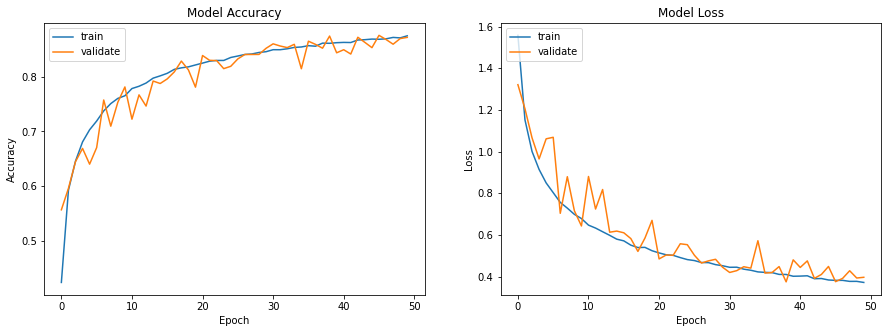

In [ ]:
print(history.history.keys())
plotmodelhistory(history)

# GradCam
## Model Interpretability & Visualization

* https://keras.io/examples/vision/grad_cam/
* https://reposhub.com/python/deep-learning/gkeechin-vizgradcam.html


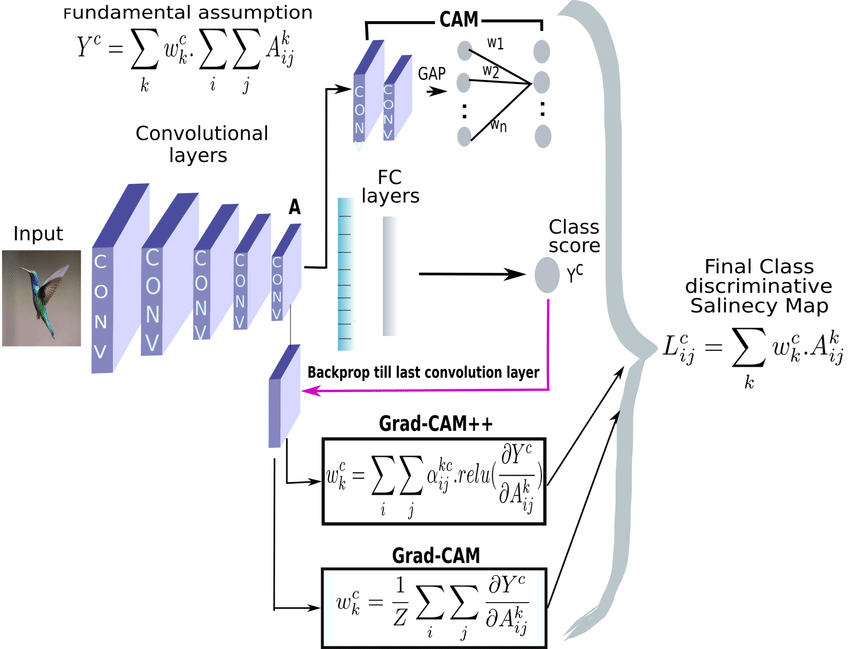

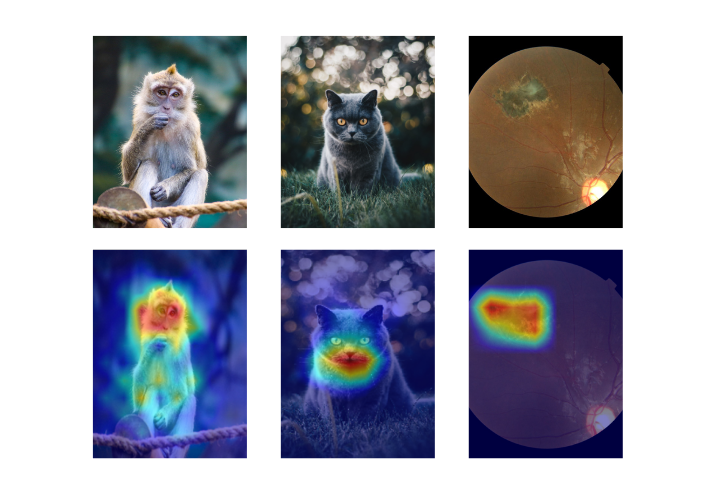

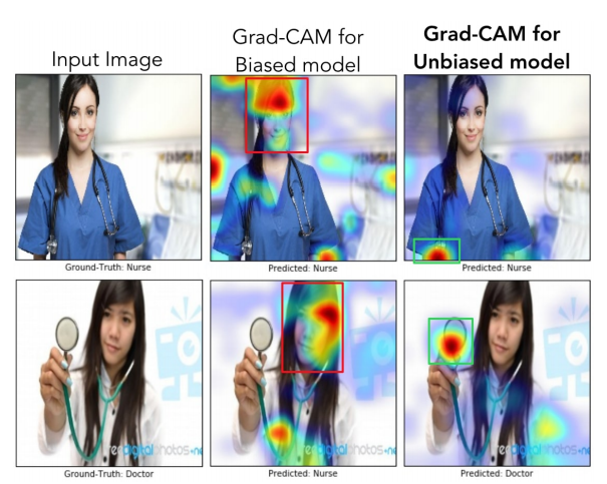

In [ ]:
def VizGradCAMM(model, image, interpolant=0.5, plot_results=True):
    """VizGradCAM - Displays GradCAM based on Keras / TensorFlow models
    using the gradients from the last convolutional layer. This function
    should work with all Keras Application listed here:
    https://keras.io/api/applications/
    Parameters:
    model (keras.model): Compiled Model with Weights Loaded
    image: Image to Perform Inference On
    plot_results (boolean): True - Function Plots using PLT
                            False - Returns Heatmap Array
    Returns:
    Heatmap Array?
    """
    # Sanity Check
    assert (
        interpolant > 0 and interpolant < 1
    ), "Heatmap Interpolation Must Be Between 0 - 1"

    #last_conv_layer = next(
    #    x for x in model.layers[::-1] if isinstance(x, K.layers.Conv2D)
    #)
    last_conv_layer_idx = 14
    original_img = image
    img = np.expand_dims(original_img, axis=0)
    prediction = model.predict(img)

    # Obtain Prediction Index
    prediction_idx = np.argmax(prediction)

    # Compute Gradient of Top Predicted Class
    with tf.GradientTape() as tape:
        grad_model = tf.keras.models.Model(
            inputs=model.inputs, outputs=[model.layers[-last_conv_layer_idx].output, model.output]
        )
        conv2d_out, prediction = grad_model(img)
        # Obtain the Prediction Loss
        loss = prediction[:, prediction_idx]

    # Gradient() computes the gradient using operations recorded
    # in context of this tape
    gradients = tape.gradient(loss, conv2d_out)

    # Obtain the Output from Shape [1 x H x W x CHANNEL] -> [H x W x CHANNEL]
    output = conv2d_out[0]

    # Obtain Depthwise Mean
    weights = tf.reduce_mean(gradients[0], axis=(0, 1))

    # Create a 7x7 Map for Aggregation
    activation_map = np.zeros(output.shape[0:2], dtype=np.float32)

    # Multiply Weights with Every Layer
    for idx, weight in enumerate(weights):
        activation_map += weight * output[:, :, idx]

    # Resize to Size of Image
    activation_map = cv2.resize(
        activation_map.numpy(), (original_img.shape[1], original_img.shape[0])
    )

    # Ensure No Negative Numbers
    activation_map = np.maximum(activation_map, 0)

    # Convert Class Activation Map to 0 - 255
    activation_map = (activation_map - activation_map.min()) / (
        activation_map.max() - activation_map.min()
    )
    activation_map = np.uint8(255 * activation_map)

    # Convert to Heatmap
    heatmap = cv2.applyColorMap(activation_map, cv2.COLORMAP_JET)

    # Superimpose Heatmap on Image Data
    original_img = np.uint8(
        (original_img - original_img.min())
        / (original_img.max() - original_img.min())
        * 255
    )

    cvt_heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    # Enlarge Plot
    plt.rcParams["figure.dpi"] = 100

    if plot_results == True:
        plt.imshow(
            np.uint8(original_img * interpolant + cvt_heatmap * (1 - interpolant))
        )
    else:
        return cvt_heatmap

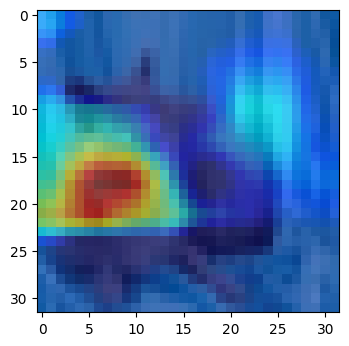

In [ ]:
VizGradCAMM(model, X_val[10], interpolant=0.5, plot_results=True)

In [ ]:
val_predictions = model.predict(X_val)
result = np.absolute(Y_val.argmax(1) - val_predictions.argmax(1))
miss_index = np.where(result != 0)[0]

In [ ]:
def show_images_pred(images, targets, preds):

  plt.figure(figsize=(15 ,15))
  for i in range(25):
      plt.subplot(5, 5,i+1)
      label = classes[np.argmax(targets[i])]
      pred = classes[preds[i].argmax()]
      plt.title(f"(T)-{label} - (p)-{pred}")
      plt.imshow(images[i])
  plt.show()

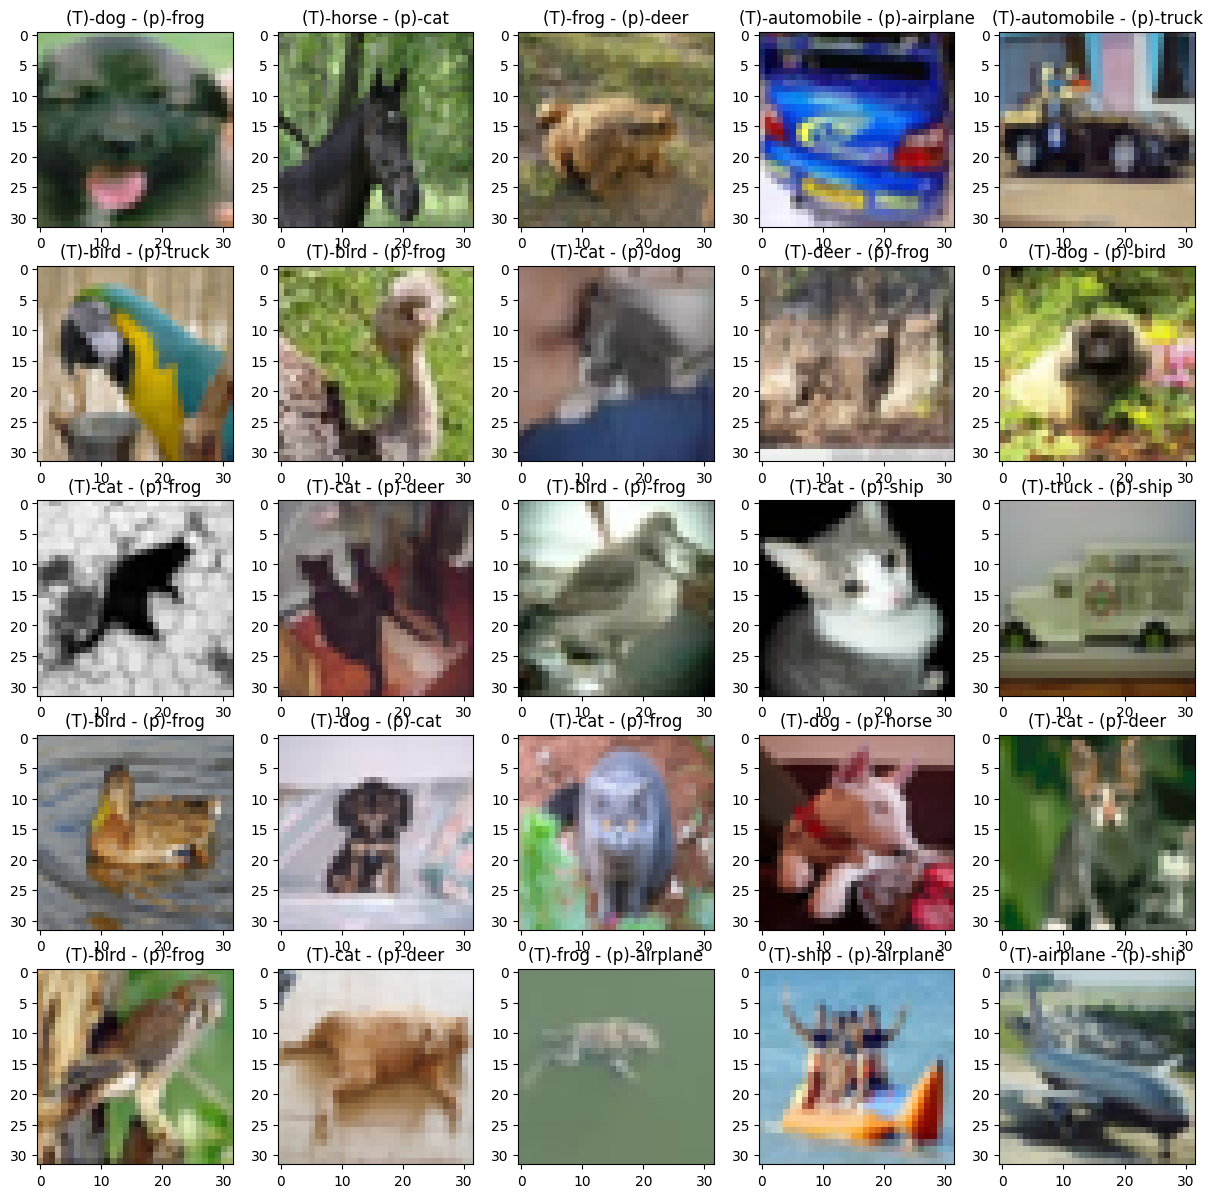

In [ ]:
show_images_pred(X_val[miss_index], Y_val[miss_index], val_predictions[miss_index])

In [ ]:
def show_misscam(images, targets, preds, model):

  plt.figure(figsize=(15 ,15))

  for i in range(25):
      plt.subplot(5, 5,i+1)
      label = classes[np.argmax(targets[i])]
      pred = classes[preds[i].argmax()]
      plt.title(f"(T)-{label} - (p)-{pred}")
      VizGradCAMM(model, images[i], interpolant=0.5, plot_results=True)
  plt.show()

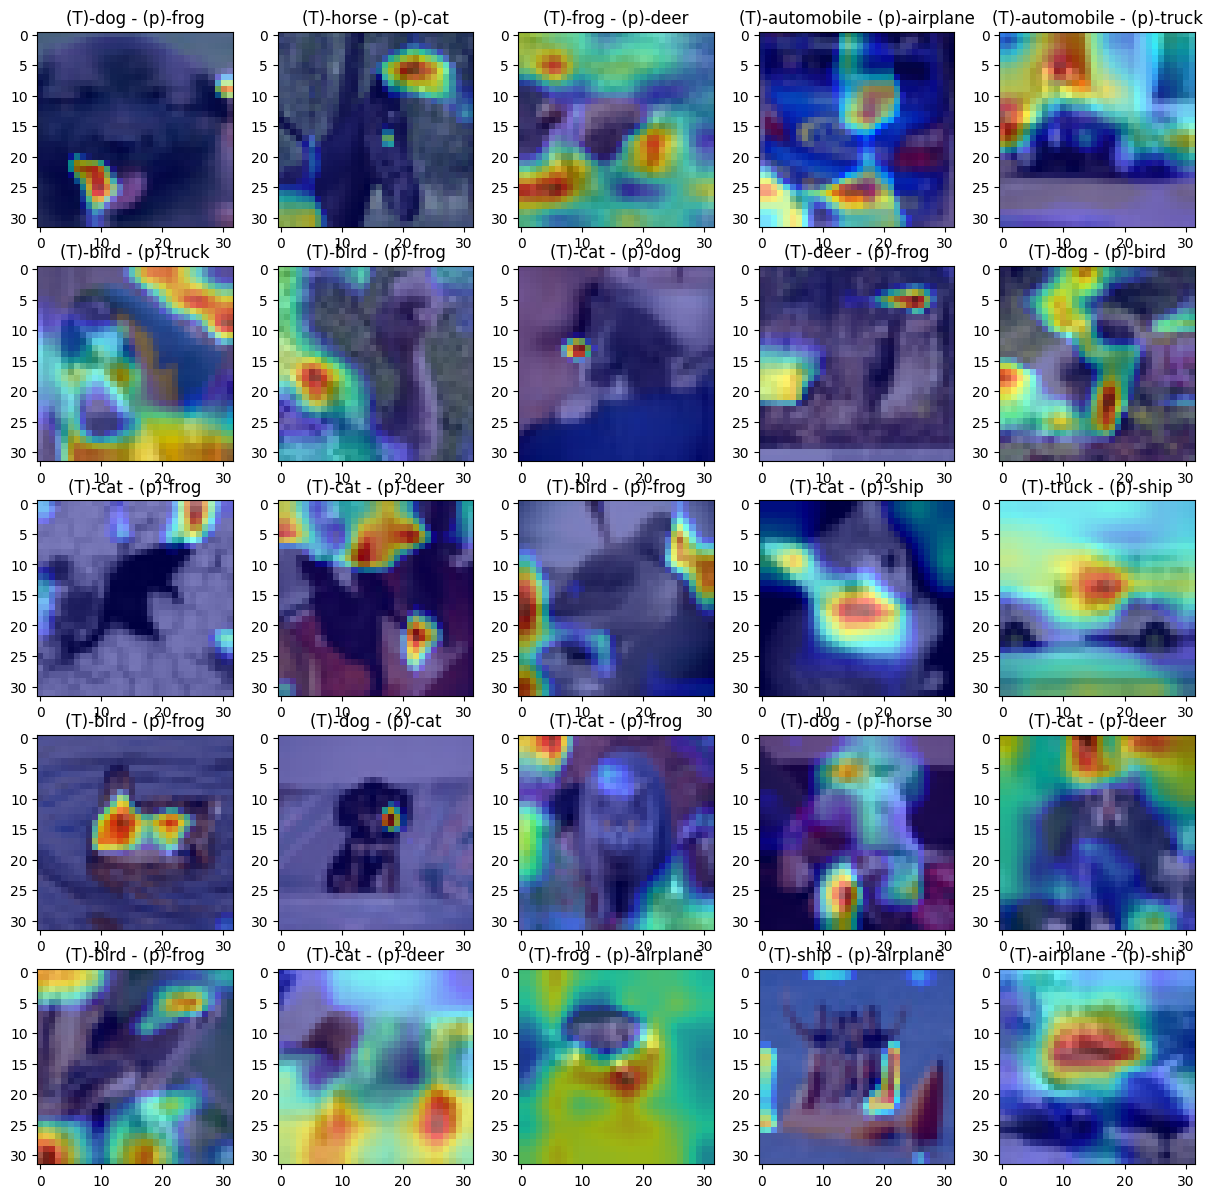

In [ ]:
show_misscam(X_val[miss_index], Y_val[miss_index], val_predictions[miss_index], model)

# Transfer Learning

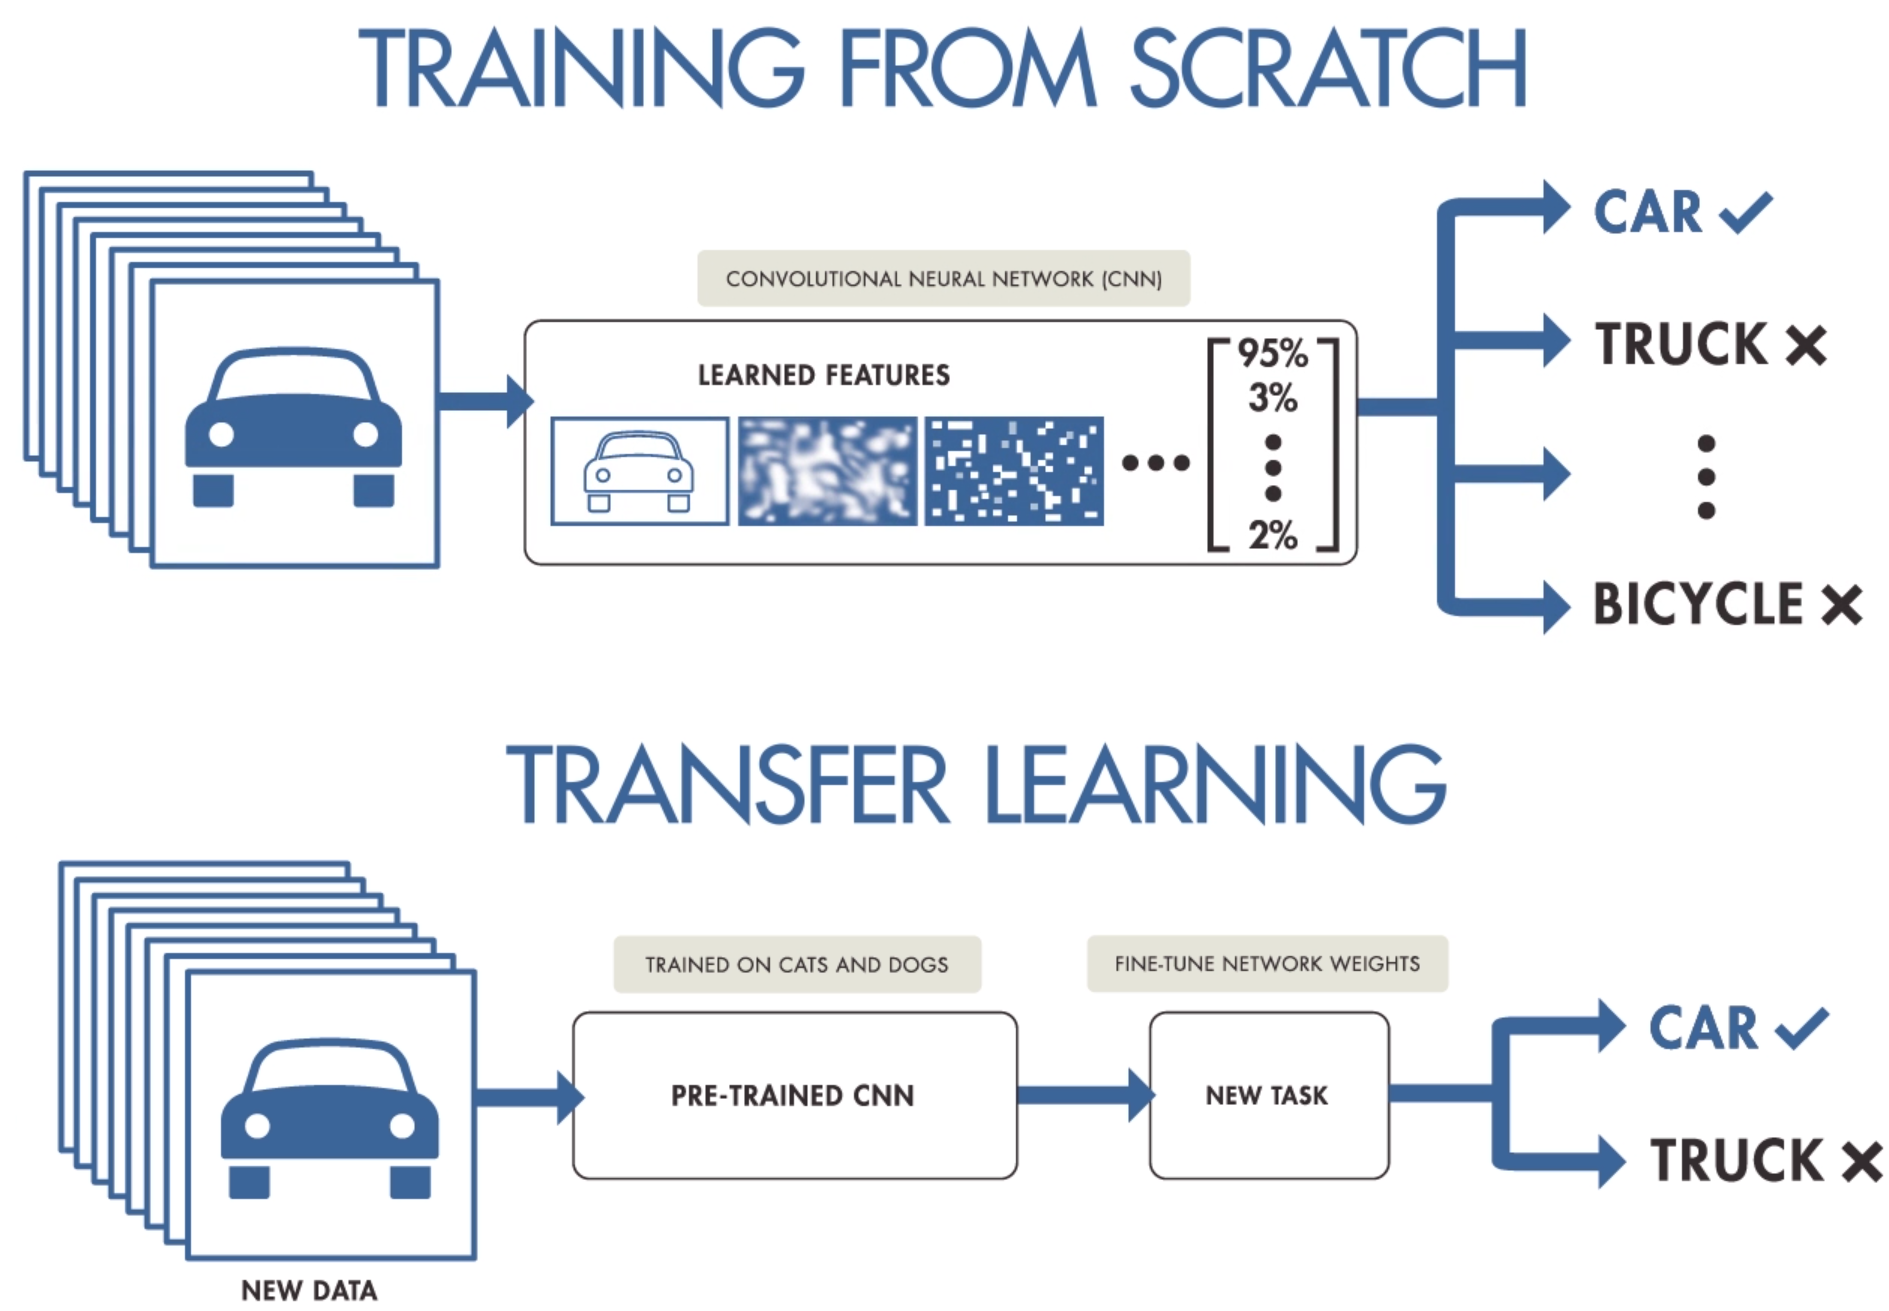

In [ ]:
'''
Feature Extraction is performed by ResNet50 pretrained on imagenet weights. 
Input size is 224 x 224.
'''
def feature_extractor(inputs):

  feature_extractor = tf.keras.applications.resnet.ResNet50(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')(inputs)
  return feature_extractor


'''
Defines final dense layers and subsequent softmax layer for classification.
'''
def classifier(inputs):
    x = tf.keras.layers.GlobalAveragePooling2D()(inputs)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(1024, activation="relu")(x)
    x = tf.keras.layers.Dense(512, activation="relu")(x)
    x = tf.keras.layers.Dense(10, activation="softmax", name="classification")(x)
    return x

'''
Since input image size is (32 x 32), first upsample the image by factor of (7x7) to transform it to (224 x 224)
Connect the feature extraction and "classifier" layers to build the model.
'''
def final_model(inputs):

    resize = tf.keras.layers.UpSampling2D(size=(7,7))(inputs)

    resnet_feature_extractor = feature_extractor(resize)
    classification_output = classifier(resnet_feature_extractor)

    return classification_output

'''
Define the model and compile it. 
Use Stochastic Gradient Descent as the optimizer.
Use Sparse Categorical CrossEntropy as the loss function.
'''
def define_compile_model():
  inputs = tf.keras.layers.Input(shape=(32,32,3))
  
  classification_output = final_model(inputs) 
  model = tf.keras.Model(inputs=inputs, outputs = classification_output)
 
  model.compile(optimizer='SGD', 
                loss='categorical_crossentropy',
                metrics = ['accuracy'])
  
  return model



In [ ]:
t_model = define_compile_model()
t_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 224, 224, 3)       0         
_________________________________________________________________
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800

In [ ]:
BATCH_SIZE = 64
EPOCHS = 10


es = EarlyStopping(patience=8, restore_best_weights=True, monitor="val_accuracy")
history = t_model.fit(aug.flow(X_train, Y_train, 
                             batch_size = BATCH_SIZE), 
                    steps_per_epoch=STEPS, 
                    batch_size = BATCH_SIZE, 
                    epochs=EPOCHS, 
                    validation_data=(X_val, Y_val),
                    callbacks=[es])

Epoch 1/10
156/156 [==============================] - 135s 827ms/step - loss: 1.2085 - accuracy: 0.5992 - val_loss: 3.6459 - val_accuracy: 0.0991
Epoch 2/10
156/156 [==============================] - 126s 810ms/step - loss: 0.5279 - accuracy: 0.8189 - val_loss: 2.6460 - val_accuracy: 0.1004
Epoch 3/10
156/156 [==============================] - 128s 817ms/step - loss: 0.3821 - accuracy: 0.8689 - val_loss: 2.4751 - val_accuracy: 0.1250
Epoch 4/10
156/156 [==============================] - 128s 817ms/step - loss: 0.3120 - accuracy: 0.8942 - val_loss: 2.3141 - val_accuracy: 0.1946
Epoch 5/10
156/156 [==============================] - 126s 810ms/step - loss: 0.2640 - accuracy: 0.9109 - val_loss: 1.2796 - val_accuracy: 0.5805
Epoch 6/10
156/156 [==============================] - 184s 1s/step - loss: 0.2435 - accuracy: 0.9172 - val_loss: 0.4089 - val_accuracy: 0.8623
Epoch 7/10
156/156 [==============================] - 127s 815ms/step - loss: 0.2221 - accuracy: 0.9233 - val_loss: 0.3316 - va

In [ ]:
ModelLoss, ModelAccuracy = t_model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE)

print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy))

157/157 [==============================] - 31s 200ms/step - loss: 0.2135 - accuracy: 0.9291
Model Loss is 0.21347665786743164
Model Accuracy is 0.929099977016449


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


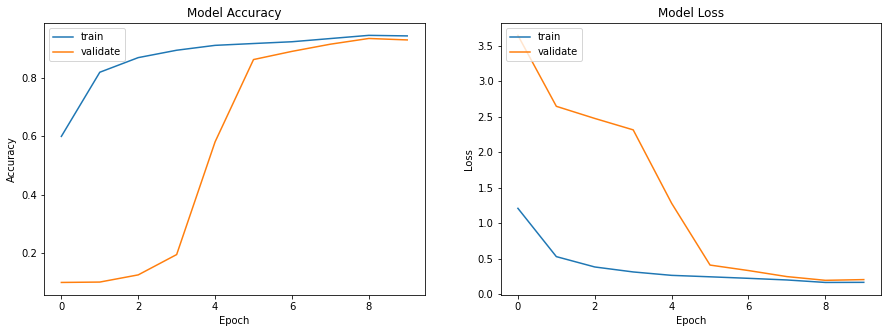

In [ ]:
print(history.history.keys())
plotmodelhistory(history)

In [ ]:
for layer in model.layers:
  layer.trainable = True